In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('2.01.+Admittance.csv')

FileNotFoundError: [Errno 2] No such file or directory: '2.01.+Admittance.csv'

In [ ]:
df.head(20)

SAT Admitted
0   1363       No
1   1792      Yes
2   1954      Yes
3   1653       No
4   1593       No
5   1755      Yes
6   1775      Yes
7   1887      Yes
8   1893      Yes
9   1580       No
10  1857      Yes
11  1880      Yes
12  1664      Yes
13  1364       No
14  1693       No
15  1850      Yes
16  1633       No
17  1634       No
18  1636      Yes
19  1855      Yes

In [ ]:
df['Admitted'].value_counts()

Yes    94
No     74
Name: Admitted, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df['Admitted'] = le.fit_transform(df.Admitted)

In [ ]:
df['Admitted'].value_counts()

1    94
0    74
Name: Admitted, dtype: int64

In [ ]:
y = df['Admitted']
x1 = df['SAT']

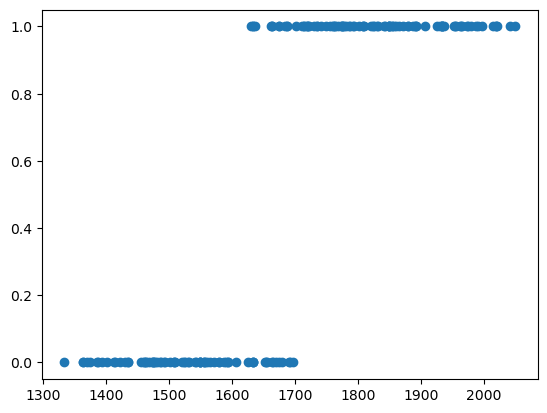

In [ ]:
plt.scatter(x1,y)

In [ ]:
model1 = smf.ols('y~x1',df).fit()

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     357.5
Date:                Sun, 25 Feb 2024   Prob (F-statistic):           2.98e-43
Time:                        11:25:43   Log-Likelihood:                -24.262
No. Observations:                 168   AIC:                             52.52
Df Residuals:                     166   BIC:                             58.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.2519      0.203    -16.038      0.000      -3.652      -2.852
x1             0.0022      0.000     18.907      0.000       0.002       0.002
==============================================================================
Omnibus:                        7.929   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.844
Skew:                           0.090   Prob(JB):                        0.146
Kurtosis:                       2.281   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model1.params

Intercept   -3.251859
x1           0.002248
dtype: float64

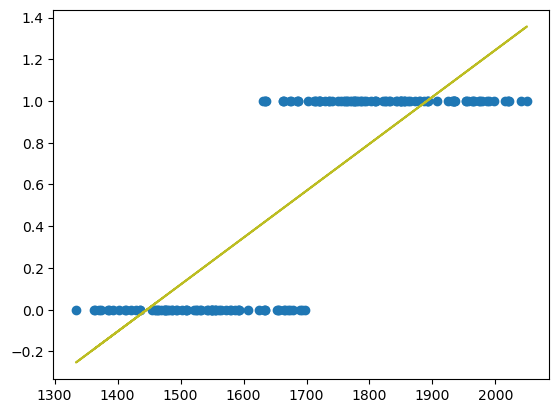

In [ ]:
plt.scatter(x1,y)
y_pred = model1.params[1]*x1+model1.params[0]
plt.plot(x1,y_pred,color='C8')
plt.show()





Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


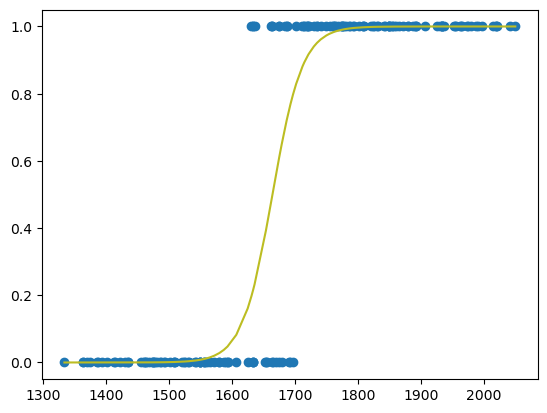

In [ ]:
model_log = smf.logit('y~x1',df).fit()


def f(x,b0,b1):
    return np.array(1/(1+np.exp(-(b0+b1*x))))


f_sorted = np.sort(f(x1,model_log.params[0],model_log.params[1]))

x_sorted = np.sort(np.array(x1))


plt.scatter(x1,y,color='C0')
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()




